In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

import os

Using TensorFlow backend.


In [2]:
# the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 11s 0us/step


In [0]:
# batch_size = 16
# num_classes = 10
# epochs = 25

In [0]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255

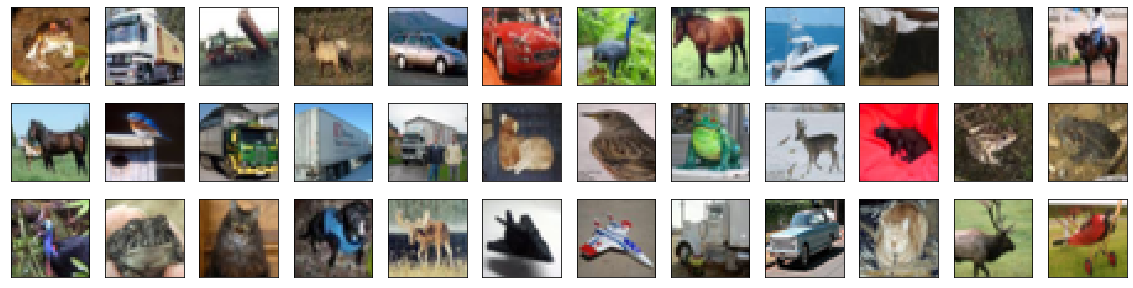

In [5]:
# check the images of Cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig_img = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig_img.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [12]:
from keras.utils import np_utils

# one hot encoding
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training sets
print('x_train shape :', x_train.shape)

# print number of training, validation, and test images
print('x_train shape: ' , x_train.shape)
print('train samples: ', x_train.shape[0])
print('test samples: ', x_test.shape[0])
print('valid samples: ', x_valid.shape[0])


x_train shape : (45000, 32, 32, 3)
x_train shape:  (45000, 32, 32, 3)
train samples:  45000
test samples:  10000
valid samples:  5000


In [13]:
# define model : CNN
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         


In [14]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# train the model
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='CNN.weights.best.hdf5', verbose=1, save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
                    verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 13s 299us/step - loss: 0.7748 - acc: 0.7243 - val_loss: 0.7501 - val_acc: 0.7516

Epoch 00001: val_loss improved from inf to 0.75009, saving model to CNN.weights.best.hdf5
Epoch 2/50
45000/45000 [==============================] - 13s 297us/step - loss: 0.7655 - acc: 0.7289 - val_loss: 0.7296 - val_acc: 0.7522

Epoch 00002: val_loss improved from 0.75009 to 0.72959, saving model to CNN.weights.best.hdf5
Epoch 3/50
45000/45000 [==============================] - 13s 296us/step - loss: 0.7613 - acc: 0.7318 - val_loss: 0.7742 - val_acc: 0.7390

Epoch 00003: val_loss did not improve from 0.72959
Epoch 4/50
45000/45000 [==============================] - 14s 305us/step - loss: 0.7598 - acc: 0.7316 - val_loss: 0.7387 - val_acc: 0.7516

Epoch 00004: val_loss did not improve from 0.72959
Epoch 5/50
45000/45000 [==============================] - 14s 303us/step - loss: 0.7576 - acc: 0.7320 - v

In [0]:
epochs_range = range(50)
validation_accuracy = history.history['val_acc']
training_accuracy = history.history['acc']

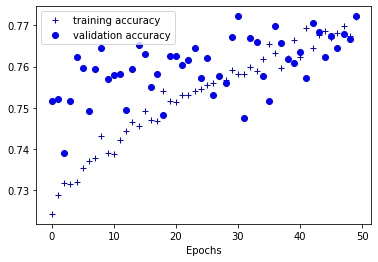

In [25]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [27]:
# evaluate and print test accuracy
scores = model.evaluate(x_test, y_test,  verbose=1)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

10000/10000 [==============================] - 1s 101us/step
Test loss:  0.717455164527893
Test accuracy:  0.7562
